In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import os

DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data'
paths = []
labels = []

for dirname, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0].lower()
        labels.append(label)

# Print the first few paths and labels
for i in range(5):  # Print the first 5 paths and labels
    print("Path:", paths[i])
    print("Label:", labels[i])
    print()

print('Dataset is Loaded')


Path: /content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_tell_fear.wav
Label: fear

Path: /content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_kill_fear.wav
Label: fear

Path: /content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_nice_fear.wav
Label: fear

Path: /content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
Label: fear

Path: /content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_wag_fear.wav
Label: fear

Dataset is Loaded


In [ ]:
len(paths), paths[:5], labels[:5]

(2800,
 ['/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_tell_fear.wav',
  '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_kill_fear.wav',
  '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_nice_fear.wav',
  '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav',
  '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_fear/YAF_wag_fear.wav'],
 ['fear', 'fear', 'fear', 'fear', 'fear'])

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Colab Notebooks/TESS To...,fear
1,/content/drive/MyDrive/Colab Notebooks/TESS To...,fear
2,/content/drive/MyDrive/Colab Notebooks/TESS To...,fear
3,/content/drive/MyDrive/Colab Notebooks/TESS To...,fear
4,/content/drive/MyDrive/Colab Notebooks/TESS To...,fear


In [ ]:
df['label'].value_counts()

label
fear       400
angry      400
ps         400
sad        400
happy      400
neutral    400
disgust    400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

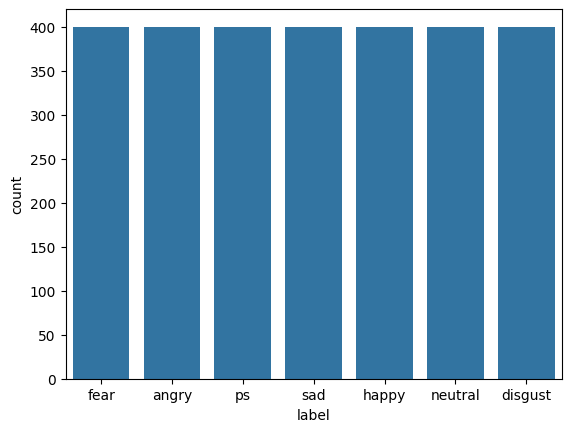

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='label')

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def plot_waveform(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f'Waveform for {emotion}', size=20)
    plt.plot(np.linspace(0, len(data) / sr, len(data)), data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f'Spectrogram for {emotion}', size=20)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


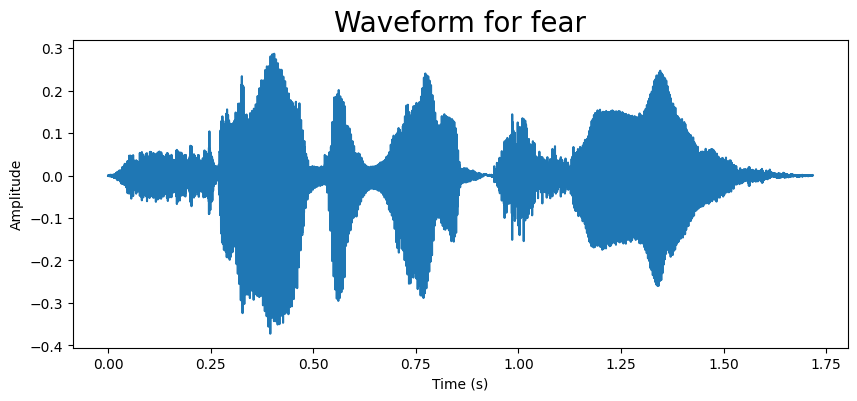

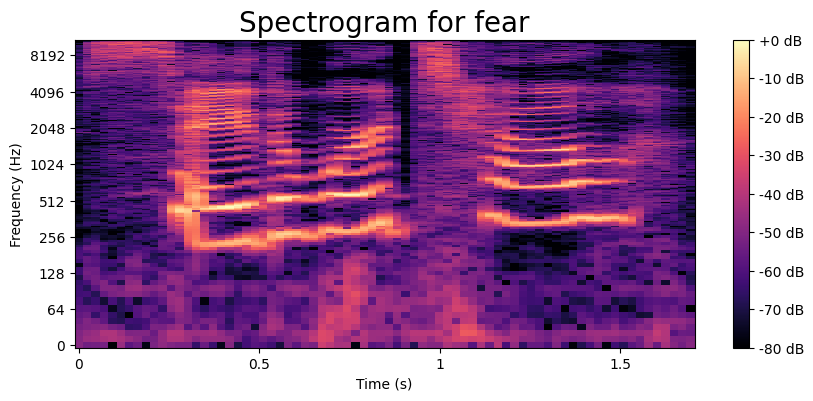

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sr = librosa.load(path)

plot_waveform(data, sr, emotion)
plot_spectrogram(data, sr, emotion)

# Play the loaded audio
Audio(data, rate=sr)


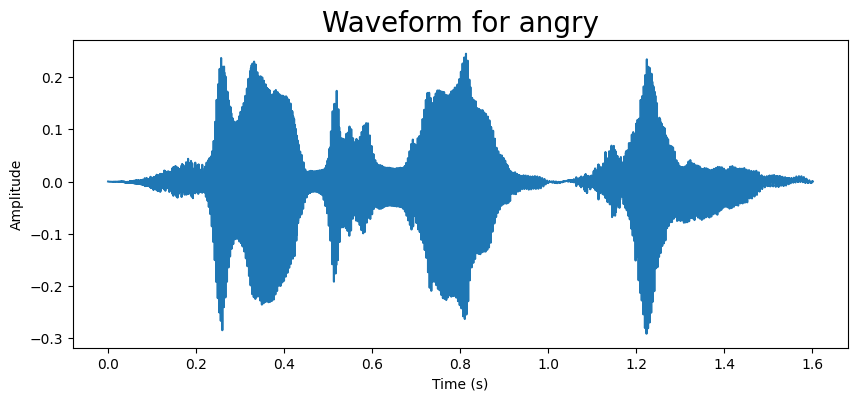

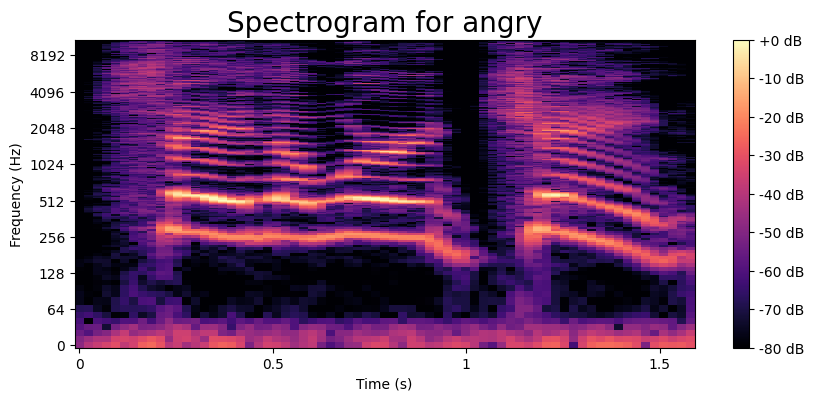

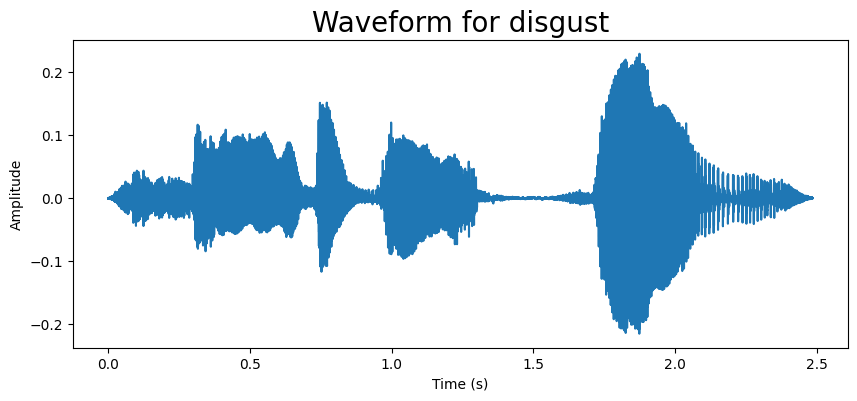

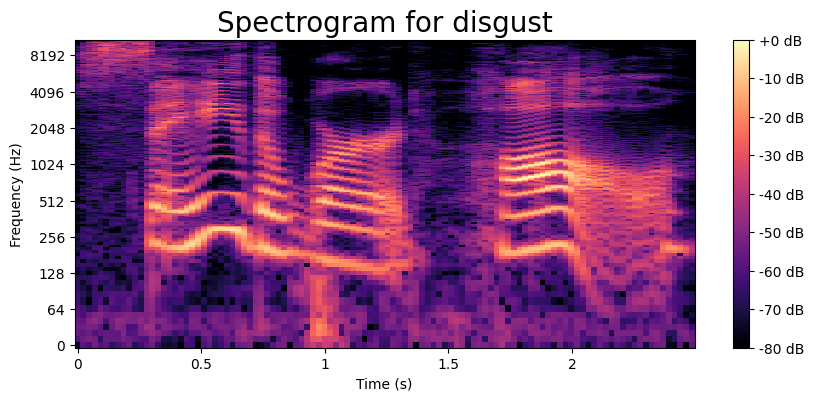

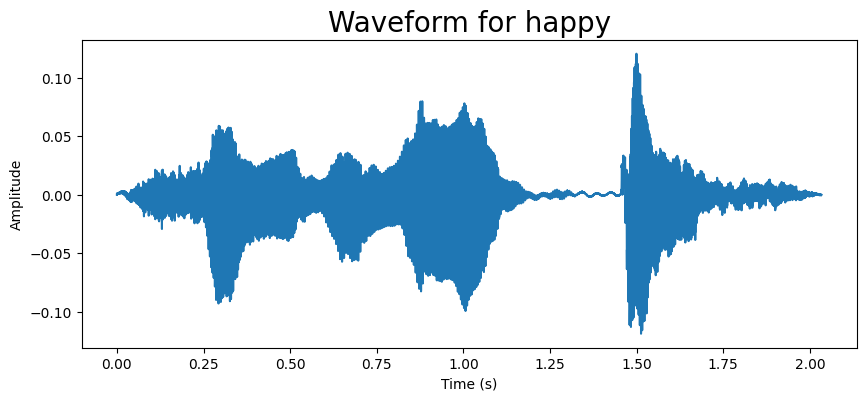

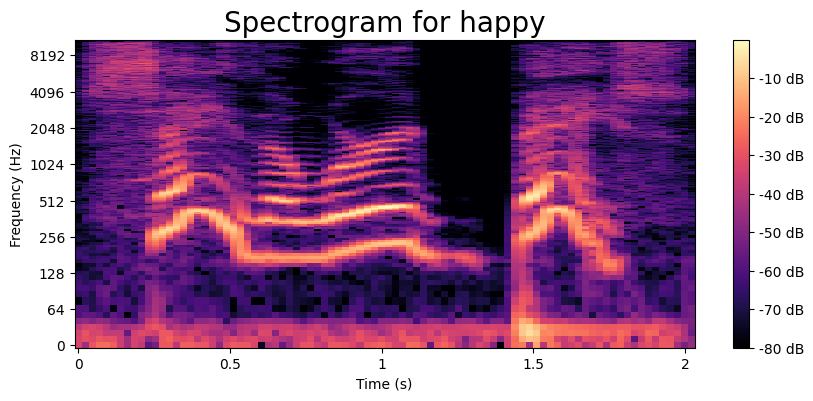

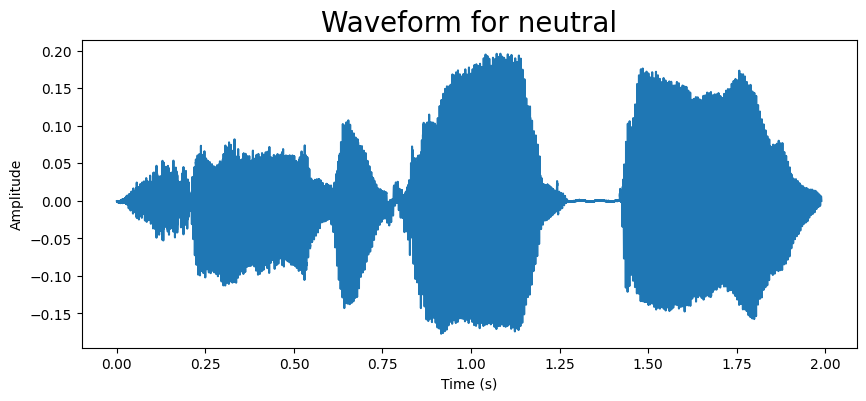

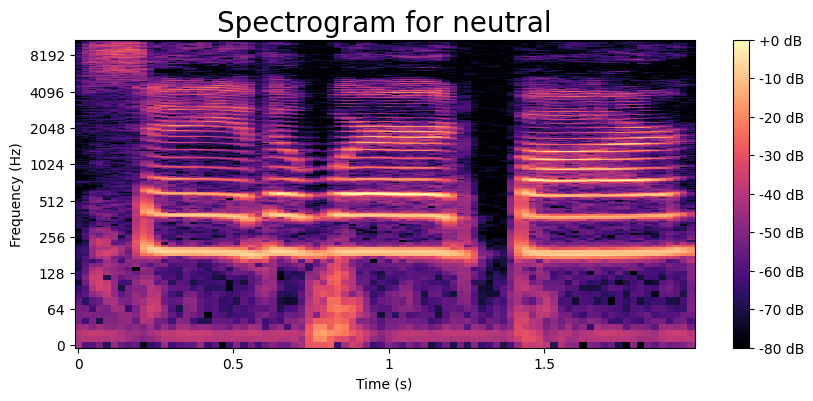

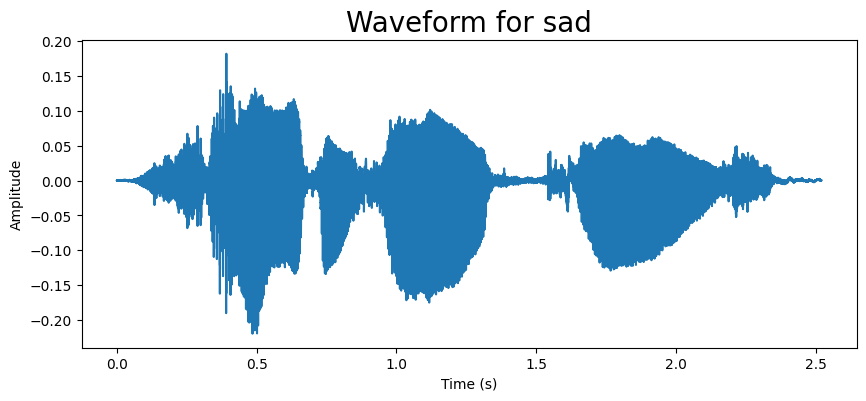

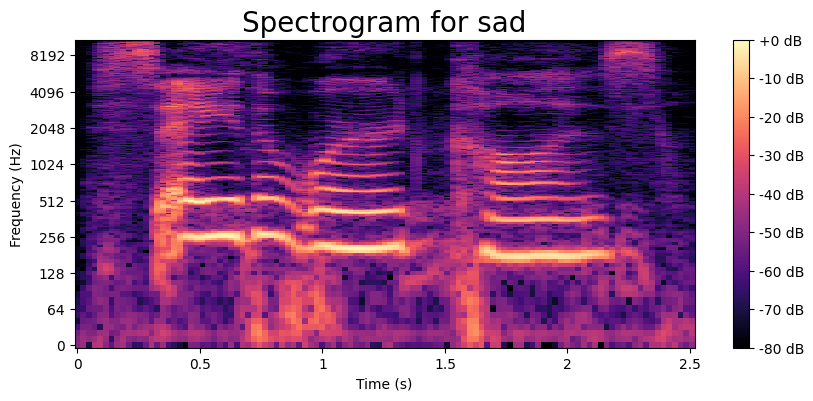

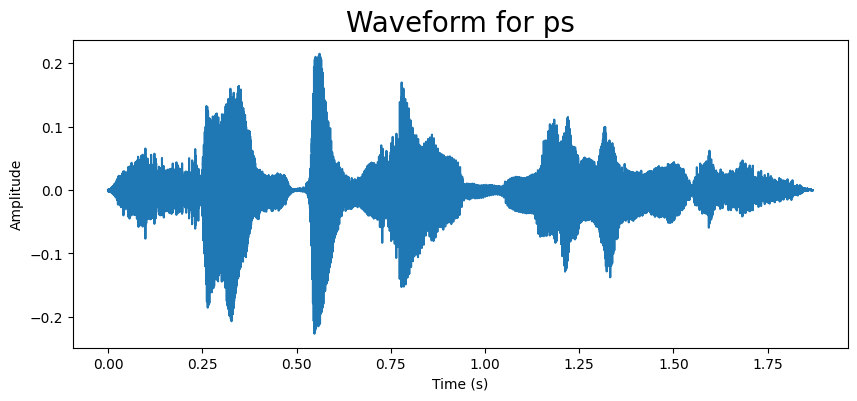

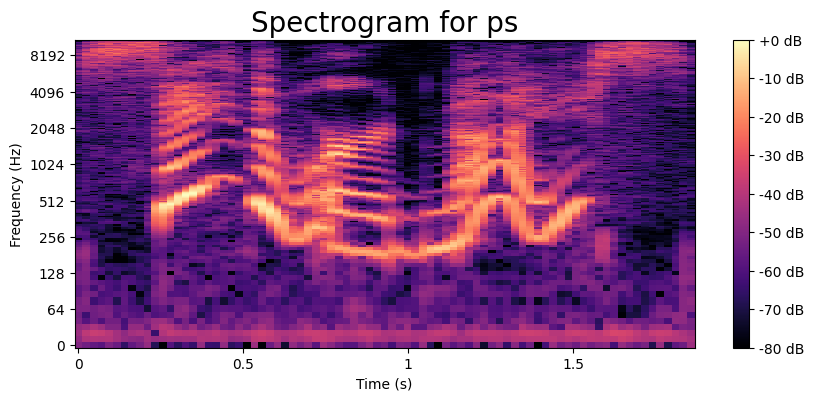

Playing audio for emotion: angry


Playing audio for emotion: disgust


Playing audio for emotion: happy


Playing audio for emotion: neutral


Playing audio for emotion: sad


Playing audio for emotion: ps


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Define function to plot waveform
def plot_waveform(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f'Waveform for {emotion}', size=20)
    plt.plot(np.linspace(0, len(data) / sr, len(data)), data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Define function to plot spectrogram
def plot_spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f'Spectrogram for {emotion}', size=20)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Define function to play audio
def play_audio(data, sr):
    return Audio(data, rate=sr)

# Load audio for each emotion, plot waveform and spectrogram, and play audio
emotions = ['angry', 'disgust', 'happy', 'neutral', 'sad', 'ps']

for emotion in emotions:
    filtered_paths = df['speech'][df['label'] == emotion]
    if len(filtered_paths) > 0:
        path = np.array(filtered_paths)[0]
        data, sr = librosa.load(path)
        plot_waveform(data, sr, emotion)
        plot_spectrogram(data, sr, emotion)
        play_audio(data, sr)
    else:
        print(f"No audio files found for {emotion}.")

# Load audio for each emotion and play audio
for emotion in emotions:
    filtered_paths = df['speech'][df['label'] == emotion]
    if len(filtered_paths) > 0:
        path = np.array(filtered_paths)[0]
        data, sr = librosa.load(path)
        print(f"Playing audio for emotion: {emotion}")
        display(Audio(data, rate=sr))
    else:
        print(f"No audio files found for {emotion}.")



Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.19299774e+02,  5.87884941e+01, -2.57505951e+01, -1.04997742e+00,
       -1.61277599e+01,  2.66550207e+00,  1.35959635e+01, -1.96776237e+01,
       -1.50202858e+00,  6.71111870e+00, -1.54055433e+01,  9.75965881e+00,
       -9.66469574e+00,  3.04066014e+00,  1.21002845e-01, -8.21123028e+00,
       -4.60612893e-01,  6.99235106e+00, -2.21691072e-01,  1.79159737e+01,
        1.21551447e+01,  1.03750830e+01,  3.77400875e+00,  4.24449205e+00,
        2.30897737e+00,  1.19569588e+01,  3.05667377e+00,  4.11401224e+00,
       -5.04401255e+00, -7.88453627e+00, -6.02210903e+00,  2.07447433e+00,
       -5.27654552e+00, -4.30444717e+00, -5.98773432e+00,  1.65074694e+00,
        2.44651270e+00,  3.71105814e+00, -4.17242348e-01,  4.02365065e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-319.29977, 58.788494, -25.750595, -1.0499774...
1       [-321.49887, 47.913506, -19.302774, 13.760705,...
2       [-344.5948, 39.12704, -6.4990253, 1.483546, 2....
3       [-383.90195, 53.061512, -12.882479, 12.845002,...
4       [-350.28387, 46.498737, -29.338766, 14.597548,...
                              ...                        
2795    [-540.12463, 97.32999, 37.288094, 4.4867206, 5...
2796    [-547.1428, 113.75922, 35.436787, -5.0645733, ...
2797    [-531.5782, 79.102394, 27.100084, 7.711531, 13...
2798    [-498.00522, 96.72543, 24.062443, -13.801257, ...
2799    [-536.9873, 102.5276, 21.73846, -8.206101, 4.8...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
35/35 [==============================] - 47s 191ms/step - loss: 1.2151 - accuracy: 0.5112 - val_loss: 0.9380 - val_accuracy: 0.5643
Epoch 2/50
35/35 [==============================] - 8s 224ms/step - loss: 0.5088 - accuracy: 0.8054 - val_loss: 0.7187 - val_accuracy: 0.7786
Epoch 3/50
35/35 [==============================] - 6s 172ms/step - loss: 0.3342 - accuracy: 0.8938 - val_loss: 1.2963 - val_accuracy: 0.5250
Epoch 4/50
35/35 [==============================] - 7s 201ms/step - loss: 0.1985 - accuracy: 0.9406 - val_loss: 1.2789 - val_accuracy: 0.6339
Epoch 5/50
35/35 [==============================] - 6s 182ms/step - loss: 0.1727 - accuracy: 0.9420 - val_loss: 0.2205 - val_accuracy: 0.9268
Epoch 6/50
35/35 [==============================] - 7s 188ms/step - loss: 0.1153 - accuracy: 0.9603 - val_loss: 0.6021 - val_accuracy: 0.8518
Epoch 7/50
35/35 [==============================] - 7s 204ms/step - loss: 0.1267 - accuracy: 0.9621 - val_loss: 0.8671 - val_accuracy: 0.7339
Epoch

In [ ]:
# Save the model to an HDF5 file
model.save('modelEA.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(len(epochs))    # Check the length of epochs
print(len(acc))       # Check the length of train accuracy
print(len(val_acc))   # Check the length of val accuracy

50
8
8


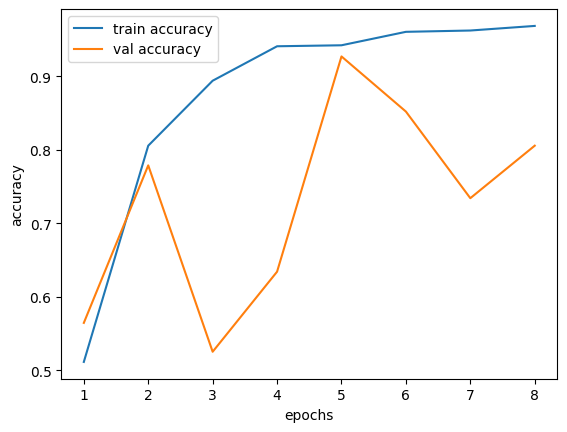

In [ ]:
import numpy as np

# Adjust the epochs list to match the length of acc or val_acc
epochs = np.arange(1, len(acc) + 1)

# Plot the accuracy curves
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


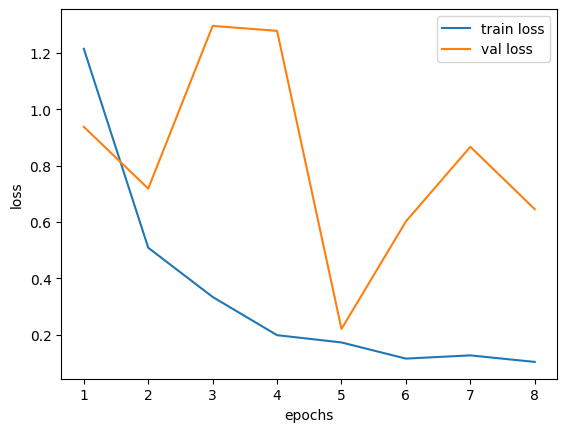

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()